In [1]:
import matplotlib.pyplot as plot
import numpy as np

%matplotlib inline

In [2]:
from pyclouds import cloud_microphysics, parameterisations
from pyclouds.common import Var
from pyclouds.plotting import plot_hydrometeor_evolution

/home/zmaw/m300464/pytools/pyclouds/cloud_microphysics.py:152: UserWarning: EoS calculation stored within microphysics, should really use something defined externally
  warnings.warn("EoS calculation stored within microphysics, should really use something defined externally")


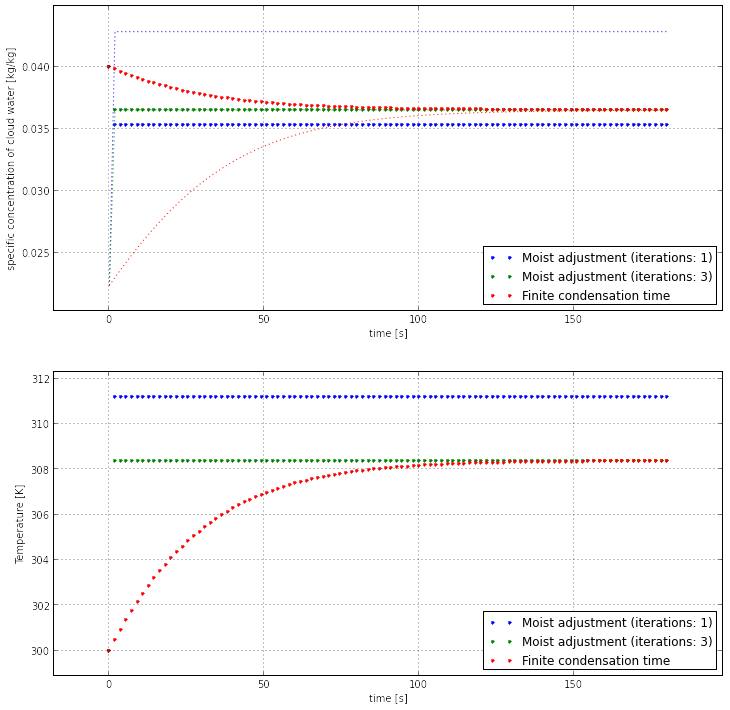

In [3]:
initial_condition = np.zeros((Var.NUM))
initial_condition[Var.q_v] = 0.04
initial_condition[Var.T] = 300.
p0 = 101325.1  # [Pa]

t_ = np.linspace(0., 180., 100)

microphysics_model = cloud_microphysics.MoistAdjustmentMicrophysics()
sol = microphysics_model.integrate(initial_condition=initial_condition, t=t_, p0=p0)
sol1 = microphysics_model.integrate(initial_condition=initial_condition, t=t_, p0=p0, iterations=3)
sol2 = cloud_microphysics.FiniteCondensationTimeMicrophysics(parameterisations=parameterisations).integrate(initial_condition=initial_condition, t=t_, p0=p0)

#sol2.plot()
plot_hydrometeor_evolution([sol, sol1, sol2], variables=['q_v', 'T',])